<a href="https://colab.research.google.com/github/shashi913/Adapt_Anti_UAV_detection_system/blob/rgb_vision_model/RT_DETR_RGB_Vision_DUT_dataset_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Verify GPU
!nvidia-smi

Fri Jan  9 16:02:31 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# 2. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Clone the official repository into the local Colab space (faster than Drive)
%cd /content/
!git clone https://github.com/lyuwenyu/RT-DETR.git

# 2. Navigate to the PyTorch implementation folder
%cd /content/RT-DETR/rtdetr_pytorch

/content
Cloning into 'RT-DETR'...
remote: Enumerating objects: 1119, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 1119 (delta 13), reused 7 (delta 7), pack-reused 1086 (from 3)
Receiving objects: 100% (1119/1119), 669.14 KiB | 2.85 MiB/s, done.
Resolving deltas: 100% (527/527), done.
/content/RT-DETR/rtdetr_pytorch


In [ ]:
# # 3. Install dependencies
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 127.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173

In [ ]:
# Check current PyTorch version
import torch
print(f"Current PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

Current PyTorch version: 2.0.1+cu117
CUDA available: True
GPU: Tesla T4


## Fix NumPy Compatibility

In [ ]:
print("Fixing NumPy compatibility...")

# Downgrade NumPy to 1.x for PyTorch 2.0.1 compatibility
!pip install "numpy<2.0" --force-reinstall

print("✅ NumPy downgraded successfully!")
print("\n⚠️  IMPORTANT: Restart runtime now!")
print("After restart, continue from below cell")

🔧 Fixing NumPy compatibility...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


✅ NumPy downgraded successfully!

⚠️  IMPORTANT: Restart runtime now!
After restart, continue from Cell 6


## Extract datasets from Google Drive to local storage (faster)

In [ ]:

import shutil
import os

drive_base = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT'
datasets = {'train': 'train.zip', 'val': 'val.zip', 'test': 'test.zip'}

for split, zip_file in datasets.items():
    zip_path = f'{drive_base}/{zip_file}'
    local_zip = f'/content/DUT-{split}.zip'
    local_extract = f'/content/DUT-{split}'

    if os.path.exists(zip_path) and not os.path.exists(local_extract):
        print(f"📦 Extracting {split}...")
        shutil.copy(zip_path, local_zip)
        !unzip -q {local_zip} -d {local_extract}
        os.remove(local_zip)

print("✅ Datasets extracted")

📦 Extracting train...
📦 Extracting val...
📦 Extracting test...
✅ Datasets extracted


## Verify XML structure

In [ ]:

import xml.etree.ElementTree as ET

test_xml_dir = '/content/DUT-train/train/xml'
sample_files = os.listdir(test_xml_dir)[:3]

print("Checking sample XML files:\n")
for sample_xml in sample_files:
    tree = ET.parse(os.path.join(test_xml_dir, sample_xml))
    root = tree.getroot()

    print(f"File: {sample_xml}")
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        print(f"  Object: {name}, BBox: [{bndbox.find('xmin').text}, {bndbox.find('ymin').text}, {bndbox.find('xmax').text}, {bndbox.find('ymax').text}]")
    print()

Checking sample XML files:

File: 03094.xml
  Object: UAV, BBox: [1178, 698, 1237, 745]

File: 02380.xml
  Object: UAV, BBox: [917, 483, 955, 512]

File: 04691.xml
  Object: UAV, BBox: [857, 598, 873, 603]



## Convert XML to COCO Format (FIXED CLASS ID)

In [ ]:
import json
import xml.etree.ElementTree as ET
from tqdm import tqdm
import os

# CRITICAL FIX: Use class ID 0 instead of 1 for RT-DETR
CLASS_MAP = {'UAV': 0}  # Changed from 1 to 0

def convert_xml_to_coco(image_dir, xml_dir, output_file, split_name):
    """Convert Pascal VOC XML annotations to COCO JSON format"""

    images = []
    annotations = []
    # CRITICAL: Use id 0 for UAV class
    categories = [{"id": 0, "name": "uav", "supercategory": "vehicle"}]

    annotation_id = 1
    image_id = 1

    print(f"\n🔄 Converting {split_name} dataset...")
    print(f"  Images: {image_dir}")
    print(f"  XMLs: {xml_dir}")

    if not os.path.exists(image_dir) or not os.path.exists(xml_dir):
        print(f"  ❌ Directory not found!")
        return

    valid_images = [f for f in os.listdir(image_dir)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"  Found {len(valid_images)} images")

    skipped = 0

    for filename in tqdm(valid_images, desc=f"Processing {split_name}"):
        xml_filename = os.path.splitext(filename)[0] + '.xml'
        xml_path = os.path.join(xml_dir, xml_filename)
        img_path = os.path.join(image_dir, filename)

        if not os.path.exists(xml_path):
            skipped += 1
            continue

        try:
            tree = ET.parse(xml_path)
            root = tree.getroot()
        except ET.ParseError:
            skipped += 1
            continue

        # Get image dimensions
        size_node = root.find('size')
        if size_node is not None:
            width = int(size_node.find('width').text)
            height = int(size_node.find('height').text)
        else:
            import cv2
            img = cv2.imread(img_path)
            if img is None:
                skipped += 1
                continue
            height, width = img.shape[:2]

        images.append({
            "id": image_id,
            "file_name": filename,
            "height": height,
            "width": width
        })

        # Extract annotations
        for obj in root.findall('object'):
            name = obj.find('name').text
            class_id = CLASS_MAP.get(name)

            if class_id is None:
                continue

            bndbox = obj.find('bndbox')
            xmin = float(bndbox.find('xmin').text)
            ymin = float(bndbox.find('ymin').text)
            xmax = float(bndbox.find('xmax').text)
            ymax = float(bndbox.find('ymax').text)

            bbox_width = xmax - xmin
            bbox_height = ymax - ymin

            if bbox_width <= 0 or bbox_height <= 0:
                continue

            annotations.append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": class_id,
                "bbox": [xmin, ymin, bbox_width, bbox_height],
                "area": bbox_width * bbox_height,
                "iscrowd": 0
            })
            annotation_id += 1

        image_id += 1

    # Save JSON
    # coco_format = {
    #     "images": images,
    #     "annotations": annotations,
    #     "categories": categories
    # }

    coco_format = {
    "info": {
        "description": "DUT UAV Dataset",
        "version": "1.0",
        "year": 2026,
        "contributor": "FYP",
        "date_created": "2026/01/09"
    },
    "images": images,
    "annotations": annotations,
    "categories": categories,
}

    os.makedirs(os.path.dirname(output_file), exist_ok=True)
    with open(output_file, 'w') as f:
        json.dump(coco_format, f)

    print(f"  ✓ {len(images)} images, {len(annotations)} annotations")
    if skipped > 0:
        print(f"  ⚠️  Skipped {skipped} files")
    print(f"  Saved to: {output_file}\n")

# Convert all datasets
base_dir = '/content'
for split in ['train', 'val', 'test']:
    dataset_dir = f'{base_dir}/DUT-{split}/{split}'

    if not os.path.exists(dataset_dir):
        print(f"⚠️  Skipping {split} - not found")
        continue

    convert_xml_to_coco(
        image_dir=f'{dataset_dir}/img',
        xml_dir=f'{dataset_dir}/xml',
        output_file=f'{base_dir}/DUT-{split}/annotations/{split}.json',
        split_name=split
    )

print("All datasets converted to COCO format with class ID 0!")


🔄 Converting train dataset...
  Images: /content/DUT-train/train/img
  XMLs: /content/DUT-train/train/xml
  Found 5200 images


Processing train: 100%|██████████| 5200/5200 [00:00<00:00, 14835.79it/s]


  ✓ 5200 images, 5243 annotations
  Saved to: /content/DUT-train/annotations/train.json


🔄 Converting val dataset...
  Images: /content/DUT-val/val/img
  XMLs: /content/DUT-val/val/xml
  Found 2600 images


Processing val: 100%|██████████| 2600/2600 [00:00<00:00, 17736.46it/s]


  ✓ 2600 images, 2620 annotations
  Saved to: /content/DUT-val/annotations/val.json


🔄 Converting test dataset...
  Images: /content/DUT-test/test/img
  XMLs: /content/DUT-test/test/xml
  Found 2200 images


Processing test: 100%|██████████| 2200/2200 [00:00<00:00, 19051.91it/s]

  ✓ 2200 images, 2245 annotations
  Saved to: /content/DUT-test/annotations/test.json

✅ All datasets converted to COCO format with class ID 0!


## Verify COCO format

In [ ]:
import json

for split in ['train', 'val', 'test']:
    json_path = f'/content/DUT-{split}/annotations/{split}.json'

    if not os.path.exists(json_path):
        continue

    with open(json_path, 'r') as f:
        data = json.load(f)

    print(f"\n{split.upper()} Dataset:")
    print(f"  Images: {len(data['images'])}")
    print(f"  Annotations: {len(data['annotations'])}")
    print(f"  Categories: {data['categories']}")

    if len(data['annotations']) > 0:
        sample = data['annotations'][0]
        print(f"  Sample annotation: {sample}")


TRAIN Dataset:
  Images: 5200
  Annotations: 5243
  Categories: [{'id': 0, 'name': 'uav', 'supercategory': 'vehicle'}]
  Sample annotation: {'id': 1, 'image_id': 1, 'category_id': 0, 'bbox': [1073.0, 664.0, 44.0, 22.0], 'area': 968.0, 'iscrowd': 0}

VAL Dataset:
  Images: 2600
  Annotations: 2620
  Categories: [{'id': 0, 'name': 'uav', 'supercategory': 'vehicle'}]
  Sample annotation: {'id': 1, 'image_id': 1, 'category_id': 0, 'bbox': [546.0, 417.0, 38.0, 33.0], 'area': 1254.0, 'iscrowd': 0}

TEST Dataset:
  Images: 2200
  Annotations: 2245
  Categories: [{'id': 0, 'name': 'uav', 'supercategory': 'vehicle'}]
  Sample annotation: {'id': 1, 'image_id': 1, 'category_id': 0, 'bbox': [650.0, 385.0, 38.0, 30.0], 'area': 1140.0, 'iscrowd': 0}


## Create Correct Config - Longer training time - Did not use

In [ ]:
# %%writefile /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml

# __include__: [
#   '../dataset/coco_detection.yml',
#   '../runtime.yml',
#   'rtdetr_r18vd_6x_coco.yml',  # Use the existing R18 config
# ]

# # Override for UAV detection
# num_classes: 1
# remap_mscoco_category: False

# # Paths
# output_dir: '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'

# # Override training dataloader
# train_dataloader:
#   dataset:
#     img_folder: '/content/DUT-train/train/img'
#     ann_file: '/content/DUT-train/annotations/train.json'

# # Override validation dataloader
# val_dataloader:
#   dataset:
#     img_folder: '/content/DUT-val/val/img'
#     ann_file: '/content/DUT-val/annotations/val.json'

Writing /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml


## Reduced training with lower epoches - Fast Training Config - Under 5 Hours with GPU

In [ ]:
%%writefile /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml

__include__: [
  '../dataset/coco_detection.yml',
  '../runtime.yml',
  'rtdetr_r18vd_6x_coco.yml',
]

# Override for UAV detection
num_classes: 1
remap_mscoco_category: False

# FAST TRAINING SETTINGS (< 5 hours with T4 GPU)
epoches: 6  # ~4.4 hours with T4 GPU   # Changed from 72 to 6
lr_warmup_scheduler:
  warmup_duration: 200

lr_scheduler:
  type: MultiStepLR
  milestones: [8, 11]  # LR drops at epoch 8 and 11
  gamma: 0.1

# lr_scheduler:
#   type: MultiStepLR
#   milestones: [4, 5]  # LR drops at epoch 4 and 5 (adjusted for 6 epochs)
#   gamma: 0.1

# Paths
output_dir: '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'

# Training dataloader - OPTIMIZED FOR SPEED
train_dataloader:
  dataset:
    img_folder: '/content/DUT-train/train/img'
    ann_file: '/content/DUT-train/annotations/train.json'
  batch_size: 16  # Increased from 16 (2x faster, T4 can handle this)
  num_workers: 2

# Validation dataloader
val_dataloader:
  dataset:
    img_folder: '/content/DUT-val/val/img'
    ann_file: '/content/DUT-val/annotations/val.json'
  batch_size: 16
  num_workers: 2

Overwriting /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml


In [ ]:
# Verify config file
!cat /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml


__include__: [
  '../dataset/coco_detection.yml',
  '../runtime.yml',
  'rtdetr_r18vd_6x_coco.yml',
]

# Override for UAV detection
num_classes: 1
remap_mscoco_category: False

# FAST TRAINING SETTINGS (< 5 hours with T4 GPU)
epoches: 6  # ~4.4 hours with T4 GPU
lr_warmup_scheduler:
  warmup_duration: 200

lr_scheduler:
  type: MultiStepLR
  milestones: [8, 11]  # LR drops at epoch 8 and 11
  gamma: 0.1

# Paths
output_dir: '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'

# Training dataloader - OPTIMIZED FOR SPEED
train_dataloader:
  dataset:
    img_folder: '/content/DUT-train/train/img'
    ann_file: '/content/DUT-train/annotations/train.json'
  batch_size: 16  # Increased from 16 (2x faster, T4 can handle this)
  num_workers: 2
  
# Validation dataloader
val_dataloader:
  dataset:
    img_folder: '/content/DUT-val/val/img'
    ann_file: '/content/DUT-val/annotations/val.json'
  batch_size: 16
  num_workers: 2


In [ ]:
# # Final verification
# import subprocess
# import sys

# test_script = """
# import sys
# sys.path.insert(0, '/content/RT-DETR/rtdetr_pytorch')

# try:
#     print("🔍 Final Import Test\\n")
#     print("="*70)

#     print("\\n1. Testing coco_dataset...")
#     from src.data.coco.coco_dataset import CocoDetection
#     print("   ✓ coco_dataset imported successfully")

#     print("\\n2. Testing transforms...")
#     from src.data.transforms import RandomPhotometricDistort, ToImage
#     print("   ✓ transforms imported successfully")

#     print("\\n3. Testing training module...")
#     import src.misc.dist as dist
#     print("   ✓ dist module imported successfully")

#     print("\\n" + "="*70)
#     print("🎉🎉🎉 ALL IMPORTS WORKING! 🎉🎉🎉")
#     print("RT-DETR is now ready to train!")
#     print("="*70)
#     exit(0)

# except Exception as e:
#     print(f"\\n❌ Still failing: {e}")
#     import traceback
#     traceback.print_exc()
#     exit(1)
# """

# result = subprocess.run([sys.executable, '-c', test_script], capture_output=True, text=True)
# print(result.stdout)
# if result.returncode != 0:
#     print(result.stderr)

In [ ]:
# # Start training
# %cd /content/RT-DETR/rtdetr_pytorch

# output_dir = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'

# !python tools/train.py \
#     -c configs/rtdetr/rtdetr_r18vd_uav.yml \
#     --amp \
#     --seed 0

## CELL 12: Test Imports - For version mismatch problem with python for RT-DETR(Should work without any patches!)

In [ ]:
import subprocess
import sys

test_script = """
import sys
sys.path.insert(0, '/content/RT-DETR/rtdetr_pytorch')

try:
    print("🔍 Testing imports...\\n")

    from src.data.coco.coco_dataset import CocoDetection
    print("✓ coco_dataset")

    from src.data.transforms import RandomPhotometricDistort
    print("✓ transforms")

    import src.misc.dist as dist
    print("✓ dist module")

    print("\\n" + "="*70)
    print("🎉 ALL IMPORTS WORKING! Ready to train!")
    print("="*70)
    exit(0)

except Exception as e:
    print(f"\\n❌ Error: {e}")
    import traceback
    traceback.print_exc()
    exit(1)
"""

result = subprocess.run([sys.executable, '-c', test_script], capture_output=True, text=True)
print(result.stdout)
if result.returncode != 0:
    print(result.stderr)

🔍 Testing imports...

✓ coco_dataset
✓ transforms
✓ dist module

🎉 ALL IMPORTS WORKING! Ready to train!



In [ ]:
# Diagnostic: Check directory structure
import os

print("Current directory:", os.getcwd())
print("\nChecking config files exist:")
print("✓" if os.path.exists('/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml') else "✗",
      "rtdetr_r18vd_uav.yml")
print("✓" if os.path.exists('/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/include/rtdetr_r18vd.yml') else "✗",
      "include/rtdetr_r18vd.yml")
print("✓" if os.path.exists('/content/RT-DETR/rtdetr_pytorch/configs/dataset/coco_detection.yml') else "✗",
      "coco_detection.yml")
print("✓" if os.path.exists('/content/RT-DETR/rtdetr_pytorch/configs/runtime.yml') else "✗",
      "runtime.yml")

Current directory: /content/RT-DETR/rtdetr_pytorch

Checking config files exist:
✓ rtdetr_r18vd_uav.yml
✗ include/rtdetr_r18vd.yml
✓ coco_detection.yml
✓ runtime.yml


In [ ]:
# Check what's actually in the include directory
!ls -la /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/include/

total 36
drwxr-xr-x 2 root root 4096 Jan  9 16:03 .
drwxr-xr-x 3 root root 4096 Jan  9 16:12 ..
-rw-r--r-- 1 root root 1110 Jan  9 16:03 dataloader_regnet.yml
-rw-r--r-- 1 root root 1110 Jan  9 16:03 dataloader.yml
-rw-r--r-- 1 root root  478 Jan  9 16:03 optimizer_regnet.yml
-rw-r--r-- 1 root root  528 Jan  9 16:03 optimizer.yml
-rw-r--r-- 1 root root 1257 Jan  9 16:03 rtdetr_dla34.yml
-rw-r--r-- 1 root root 1324 Jan  9 16:03 rtdetr_r50vd.yml
-rw-r--r-- 1 root root 1258 Jan  9 16:03 rtdetr_regnet.yml


In [ ]:
# Find all rtdetr config files
!find /content/RT-DETR/rtdetr_pytorch/configs -name "*r18*" -o -name "*rtdetr*" | grep -E "\.(yml|yaml)$"

/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_6x_coco.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r101vd_6x_coco.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r50vd_6x_coco.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r34vd_6x_coco.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r50vd_m_6x_coco.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/include/rtdetr_regnet.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/include/rtdetr_r50vd.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/include/rtdetr_dla34.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_regnet_6x_coco.yml
/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_dla34_6x_coco.yml


# CELL 13: Start Training (ENABLE GPU FIRST!)

In [ ]:
import os
os.chdir('/content/RT-DETR/rtdetr_pytorch')
print(f"Current directory: {os.getcwd()}")

!python tools/train.py \
    -c configs/rtdetr/rtdetr_r18vd_uav.yml \
    --amp \
    --seed 0

Current directory: /content/RT-DETR/rtdetr_pytorch
Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
Not init distributed mode.
Start training
Load PResNet18 state_dict
Initial lr:  [1e-05, 1e-05, 0.0001, 0.0001]
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
number of params: 20083028
Epoch: [0]  [   0/1300]  eta: 2:46:48  lr: 0.000010  loss: 27.0257 (27.0257)  loss_vfl: 0.0016 (0.00

In [ ]:
import os
os.chdir('/content/RT-DETR/rtdetr_pytorch')
print(f"Current directory: {os.getcwd()}")

!python tools/train.py \
    -c configs/rtdetr/rtdetr_r18vd_uav.yml \
    --amp \
    --seed 0

Current directory: /content/RT-DETR/rtdetr_pytorch
Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
Not init distributed mode.
Start training
Load PResNet18 state_dict
Initial lr:  [1e-05, 1e-05, 0.0001, 0.0001]
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
number of params: 20083028
Epoch: [0]  [  0/325]  eta: 0:56:24  lr: 0.000010  loss: 21.8247 (21.8247)  loss_vfl: 0.0064 (0.0064)  loss_bbox: 1.0374 (1.0374)  loss_giou: 2.5347 (2.5347)  loss_vfl_aux_0: 0.0088 (0.0088)  loss_bbox_aux_0: 1.1931 (1.1931)  loss_giou_aux_0: 2.4514 (2.4514)  loss_vfl_aux_1: 0.0080 (0.0080)  loss_bbox_aux_1: 1.0906 (1.0906)  loss_giou_aux_1: 2.5026 (2.5026)  loss_vfl_aux_2: 0.0341 (0.0341)  loss_bbox_aux_2: 1.0259 (1.0259)  loss_giou_aux_2: 2.5068 (2.5068)  loss_vfl_dn_0: 0.9102 (0.9102)  loss_bbox_dn_0: 0.2799 (0.2799)  loss_giou_dn_0: 1.3763 (1.3763)  loss_vfl_dn_1: 

## Evaluate on Test Set

In [ ]:
import os
os.chdir('/content/RT-DETR/rtdetr_pytorch')

# Use the best checkpoint (or latest)
checkpoint_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint.pth'

# Or use a specific epoch checkpoint
# checkpoint_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0006.pth'

print(f"Evaluating checkpoint: {checkpoint_path}\n")

!python tools/train.py \
    -c configs/rtdetr/rtdetr_r18vd_uav.yml \
    -r {checkpoint_path} \
    --test-only

Evaluating checkpoint: /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint.pth

Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
Not init distributed mode.
Load PResNet18 state_dict
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
resume from /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint.pth
Loading last_epoch
Loading model.state_dict
Loading ema.state_dict
Test:  [  0/163]  eta: 0:08:55    time: 3.2874  data: 1.1156  max mem: 2182
Test:  [ 10/163]  eta: 0:02:18    time: 0.9057  data: 0.1821  max mem: 2190
Test:  [ 20/163]  eta: 0:01:55    time: 0.6823  data: 0.0904  max mem: 2190
Test:  [ 30/163]  eta: 0:01:40    time: 0.6743  data: 0.0969  max mem: 2190
Test:  [ 40/163]  eta: 0:01:33    time: 0.7046  data: 0.1194  max mem: 2190
Test:  [ 50/163]  eta: 0:01:25    time: 0.7473  data: 0.1240  max mem: 2190
Test:  [ 60/163]  eta: 0:01:17    time: 0.7552  data: 0.1238  max mem: 2190
Test:  [ 70/16

## Evaluate on Validation Set

In [ ]:
import os
os.chdir('/content/RT-DETR/rtdetr_pytorch')

checkpoint_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint.pth'

# This evaluates on the validation set
!python tools/train.py \
    -c configs/rtdetr/rtdetr_r18vd_uav.yml \
    -r {checkpoint_path} \
    --test-only \
    --eval

Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
usage: train.py [-h] [--config CONFIG] [--resume RESUME] [--tuning TUNING]
                [--test-only] [--amp] [--seed SEED]
train.py: error: unrecognized arguments: --eval


## Test Model on Custom Images

In [ ]:
# import os
# os.chdir('/content/RT-DETR/rtdetr_pytorch')

# # Path to test images
# test_image = '/content/DUT-test/test/img/00001.jpg'  # Change to your image
# checkpoint_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint.pth'

# !python tools/infer.py \
#     -c configs/rtdetr/rtdetr_r18vd_uav.yml \
#     -r {checkpoint_path} \
#     --im {test_image} \
#     --save-dir /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/predictions

Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
usage: infer.py [-h] [-c CONFIG] [-r RESUME] [-f IM_FILE] [-s SLICED]
                [-d DEVICE] [-nc NUMBEROFBOXES]
infer.py: error: unrecognized arguments: --save-dir /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/predictions


## Comprehensive Evaluation

In [ ]:
import os
import json
import glob

os.chdir('/content/RT-DETR/rtdetr_pytorch')

# Find all checkpoints
checkpoint_dir = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'
checkpoints = sorted(glob.glob(f'{checkpoint_dir}/checkpoint*.pth'))

print("Available checkpoints:")
for i, ckpt in enumerate(checkpoints):
    print(f"  {i}: {os.path.basename(ckpt)}")

# Choose checkpoint to evaluate
checkpoint_path = checkpoints[-1]  # Use last checkpoint
print(f"\nEvaluating: {os.path.basename(checkpoint_path)}\n")

# Evaluate on test set
!python tools/train.py \
    -c configs/rtdetr/rtdetr_r18vd_uav.yml \
    -r {checkpoint_path} \
    --test-only

print("\n" + "="*70)
print("Evaluation complete!")
print("="*70)

Available checkpoints:
  0: checkpoint.pth
  1: checkpoint0000.pth
  2: checkpoint0001.pth
  3: checkpoint0002.pth
  4: checkpoint0003.pth
  5: checkpoint0004.pth
  6: checkpoint0005.pth

Evaluating: checkpoint0005.pth

Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
Not init distributed mode.
Load PResNet18 state_dict
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
resume from /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0005.pth
Loading last_epoch
Loading model.state_dict
Loading ema.state_dict
Test:  [  0/163]  eta: 0:09:24    time: 3.4622  data: 1.5356  max mem: 2182
Test:  [ 10/163]  eta: 0:02:12    time: 0.8644  data: 0.2156  max mem: 2190
Test:  [ 20/163]  eta: 0:01:56    time: 0.6823  data: 0.0991  max mem: 2190
Test:  [ 30/163]  eta: 0:01:40    time: 0.6956  data: 0.1028  max mem: 2190
Test:  [ 40/163]  eta: 0:01:33    time: 0.6992  data: 0.1134  max mem: 2190
Test:  [ 50/163]  eta: 0:01:24    time:

## View Training Results

In [ ]:
import json
import os

output_dir = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'

# Check if log file exists
log_file = f'{output_dir}/log.txt'
if os.path.exists(log_file):
    print("📊 Last 30 lines of training log:\n")
    !tail -n 30 {log_file}
else:
    print("No log file found")

# Check for results JSON (if saved)
results_files = [f for f in os.listdir(output_dir) if f.endswith('.json')]
if results_files:
    print(f"\n📈 Results files: {results_files}")

📊 Last 30 lines of training log:

{"train_lr": 9.999999999999721e-06, "train_loss": 12.929051577494695, "train_loss_vfl": 0.6178993401160607, "train_loss_bbox": 0.23831004109018697, "train_loss_giou": 1.0863538768658272, "train_loss_vfl_aux_0": 0.5780456117483286, "train_loss_bbox_aux_0": 0.25542298827177057, "train_loss_giou_aux_0": 1.1397918576460617, "train_loss_vfl_aux_1": 0.6030027565589318, "train_loss_bbox_aux_1": 0.24484960404296335, "train_loss_giou_aux_1": 1.1012993679826075, "train_loss_vfl_aux_2": 0.5023901132436899, "train_loss_bbox_aux_2": 0.28964903537184, "train_loss_giou_aux_2": 1.2726600711162275, "train_loss_vfl_dn_0": 0.37206580528846156, "train_loss_bbox_dn_0": 0.19353511509987023, "train_loss_giou_dn_0": 1.1494209941075397, "train_loss_vfl_dn_1": 0.38567110501802887, "train_loss_bbox_dn_1": 0.1819345118649877, "train_loss_giou_dn_1": 1.084523302087417, "train_loss_vfl_dn_2": 0.3874132361778846, "train_loss_bbox_dn_2": 0.17742894085553976, "train_loss_giou_dn_2": 1

## Visualize Model Predictions

In [ ]:
# import os
# import cv2
# import torch
# import matplotlib.pyplot as plt
# from PIL import Image

# os.chdir('/content/RT-DETR/rtdetr_pytorch')

# # Load model
# checkpoint_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint.pth'

# # Run inference on multiple test images
# test_images = [
#     '/content/DUT-test/test/img/00001.jpg',
#     '/content/DUT-test/test/img/00002.jpg',
#     '/content/DUT-test/test/img/00003.jpg',
# ]

# for img_path in test_images:
#     if os.path.exists(img_path):
#         print(f"Processing: {os.path.basename(img_path)}")

#         !python tools/infer.py \
#             -c configs/rtdetr/rtdetr_r18vd_uav.yml \
#             -r {checkpoint_path} \
#             --im {img_path} \
#             --save-dir /content/predictions

# # Display results
# print("\n✅ Predictions saved to /content/predictions")
# print("Displaying results...")

# from IPython.display import Image as IPImage, display

# pred_images = sorted(glob.glob('/content/predictions/*.jpg'))
# for pred_img in pred_images[:5]:  # Show first 5
#     print(f"\n{os.path.basename(pred_img)}:")
#     display(IPImage(pred_img))

Processing: 00001.jpg
Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
usage: infer.py [-h] [-c CONFIG] [-r RESUME] [-f IM_FILE] [-s SLICED]
                [-d DEVICE] [-nc NUMBEROFBOXES]
infer.py: error: unrecognized arguments: --save-dir /content/predictions
Processing: 00002.jpg
Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
usage: infer.py [-h] [-c CONFIG] [-r RESUME] [-f IM_FILE] [-s SLICED]
                [-d DEVICE] [-nc NUMBEROFBOXES]
infer.py: error: unrecognized arguments: --save-dir /content/predictions
Processing: 00003.jpg
Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
usage: infer.py [-h] [-c CONFIG] [-r RESUME] [-f IM_FILE] [-s SLICED]
                [-d DEVICE] [-nc NUMBEROFBOXES]
infer.py: error: unrecognized arguments: --save-dir /content/predictions

✅ Predictions saved to /content/predictions
Displaying results...


In [ ]:
# # CELL: Evaluate Model on Test Set
# import os
# os.chdir('/content/RT-DETR/rtdetr_pytorch')

# # Run evaluation using the training script with --test-only flag
# !python tools/train.py \
#   -c configs/rtdetr/rtdetr_r18vd_uav.yml \
#   --test-only \
#   -r /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth \
#   --test-annotation /content/DUT-test/annotations/test.json \
#   --test-img-folder /content/DUT-test/test/img


Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
usage: train.py [-h] [--config CONFIG] [--resume RESUME] [--tuning TUNING]
                [--test-only] [--amp] [--seed SEED]
train.py: error: unrecognized arguments: --test-annotation /content/DUT-test/annotations/test.json --test-img-folder /content/DUT-test/test/img


In [ ]:
# # CELL: Evaluate Trained Model on Test Set
# !python /content/RT-DETR/rtdetr_pytorch/tools/train.py \
#   -c /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml \
#   --test-only \
#   -r /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint_best.pth


Disabling PyTorch because PyTorch >= 2.1 is required but found 2.0.1
Not init distributed mode.
Load PResNet18 state_dict
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
resume from /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint_best.pth
Traceback (most recent call last):
  File "/content/RT-DETR/rtdetr_pytorch/tools/train.py", line 50, in <module>
    main(args)
  File "/content/RT-DETR/rtdetr_pytorch/tools/train.py", line 34, in main
    solver.val()
  File "/content/RT-DETR/rtdetr_pytorch/tools/../src/solver/det_solver.py", line 93, in val
    self.eval()
  File "/content/RT-DETR/rtdetr_pytorch/tools/../src/solver/solver.py", line 67, in eval
    self.resume(self.cfg.resume)
  File "/content/RT-DETR/rtdetr_pytorch/tools/../src/solver/solver.py", line 139, in resume
    state = torch.load(path, map_location='cpu')
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/serializatio

## Detailed Performance Analysis

In [ ]:
# from pycocotools.coco import COCO
# from pycocotools.cocoeval import COCOeval

# # Load ground truth and predictions
# coco_gt = COCO('/content/DUT-test/annotations/test.json')
# coco_dt = coco_gt.loadRes('path_to_predictions.json')  # Generated during evaluation

# # Evaluate
# coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
# coco_eval.evaluate()
# coco_eval.accumulate()
# coco_eval.summarize()

# # Print detailed metrics
# print("\nDetailed Performance:")
# print(f"Small UAVs AP: {coco_eval.stats[3]:.3f}")
# print(f"Medium UAVs AP: {coco_eval.stats[4]:.3f}")
# print(f"Large UAVs AP: {coco_eval.stats[5]:.3f}")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_predictions.json'

## Find Checkpoint Files

In [ ]:
import os

# Check what files exist in the output directory
output_dir = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'

print("Checking output directory...")
if os.path.exists(output_dir):
    print(f"\n✓ Directory exists: {output_dir}")
    print("\nFiles in output directory:")
    for file in os.listdir(output_dir):
        filepath = os.path.join(output_dir, file)
        size_mb = os.path.getsize(filepath) / (1024*1024)
        print(f"  - {file} ({size_mb:.1f} MB)")
else:
    print(f"\n✗ Directory does not exist: {output_dir}")
    print("\nSearching for checkpoint files...")

    # Search in common locations
    search_paths = [
        '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/',
        '/content/RT-DETR/rtdetr_pytorch/output/',
        '/content/output/',
    ]

    for search_path in search_paths:
        if os.path.exists(search_path):
            print(f"\nChecking: {search_path}")
            for root, dirs, files in os.walk(search_path):
                for file in files:
                    if file.endswith('.pth'):
                        full_path = os.path.join(root, file)
                        size_mb = os.path.getsize(full_path) / (1024*1024)
                        print(f"  Found: {full_path} ({size_mb:.1f} MB)")


Checking output directory...

✓ Directory exists: /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output

Files in output directory:
  - checkpoint.pth (307.3 MB)
  - checkpoint0000.pth (307.3 MB)
  - log.txt (0.0 MB)
  - eval (0.0 MB)
  - checkpoint0001.pth (307.3 MB)
  - checkpoint0002.pth (307.3 MB)
  - checkpoint0003.pth (307.3 MB)
  - checkpoint0004.pth (307.3 MB)
  - checkpoint0005.pth (307.3 MB)
  - eval.pth (0.4 MB)


## Export Trained Model to ONNX

In [ ]:

import torch
import torch.onnx
import sys
sys.path.insert(0, '/content/RT-DETR/rtdetr_pytorch')

from src.core import YAMLConfig

# 1. Load configuration
print("Loading model configuration...")
cfg = YAMLConfig('/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml')

# 2. Load the best checkpoint (Epoch 4) - CORRECTED PATH
checkpoint_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth'
print(f"Loading checkpoint from {checkpoint_path}...")
checkpoint = torch.load(checkpoint_path, map_location='cuda')

# 3. Build model from config
model = cfg.model.cuda()

# 4. Load trained weights
if 'ema' in checkpoint:
    model.load_state_dict(checkpoint['ema']['module'])
    print("✓ Loaded EMA weights")
elif 'model' in checkpoint:
    model.load_state_dict(checkpoint['model'])
    print("✓ Loaded model weights")
else:
    model.load_state_dict(checkpoint)
    print("✓ Loaded checkpoint weights")

# 5. Set to evaluation mode
model.eval()
print("✓ Model set to evaluation mode")

# 6. Create dummy input (640x640 is standard for RT-DETR)
dummy_input = torch.randn(1, 3, 640, 640).cuda()

# 7. Export to ONNX - CORRECTED OUTPUT NAMES (only 2 outputs)
output_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_epoch4.onnx'
print(f"\nExporting to ONNX at {output_path}...")

torch.onnx.export(
    model,
    dummy_input,
    output_path,
    opset_version=16,
    input_names=['images'],
    output_names=['pred_boxes', 'pred_scores'],  # RT-DETR outputs only 2 tensors
    dynamic_axes={
        'images': {0: 'batch'},
        'pred_boxes': {0: 'batch'},
        'pred_scores': {0: 'batch'}
    },
    verbose=False
)

print("\n✅ Model successfully exported to ONNX!")
print(f"Saved at: {output_path}")
print(f"\nModel Details:")
print(f"  Input: 'images' [batch, 3, 640, 640]")
print(f"  Outputs:")
print(f"    - 'pred_boxes': [batch, num_queries, 4] (bounding boxes)")
print(f"    - 'pred_scores': [batch, num_queries, 1] (class scores)")


Loading model configuration...
Loading checkpoint from /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth...
Load PResNet18 state_dict
✓ Loaded EMA weights
✓ Model set to evaluation mode

Exporting to ONNX at /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_epoch4.onnx...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================


✅ Model successfully exported to ONNX!
Saved at: /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_epoch4.onnx

Model Details:
  Input: 'images' [batch, 3, 640, 640]
  Outputs:
    - 'pred_boxes': [batch, num_queries, 4] (bounding boxes)
    - 'pred_scores': [batch, num_queries, 1] (class scores)


## Inference on Sample Images with Visualization

Loading model...
Load PResNet18 state_dict
✓ Model loaded successfully

Running inference on 5 test images...

Image 1/5: 00001.jpg
  Detections: 2 UAVs found (confidence > 0.5)


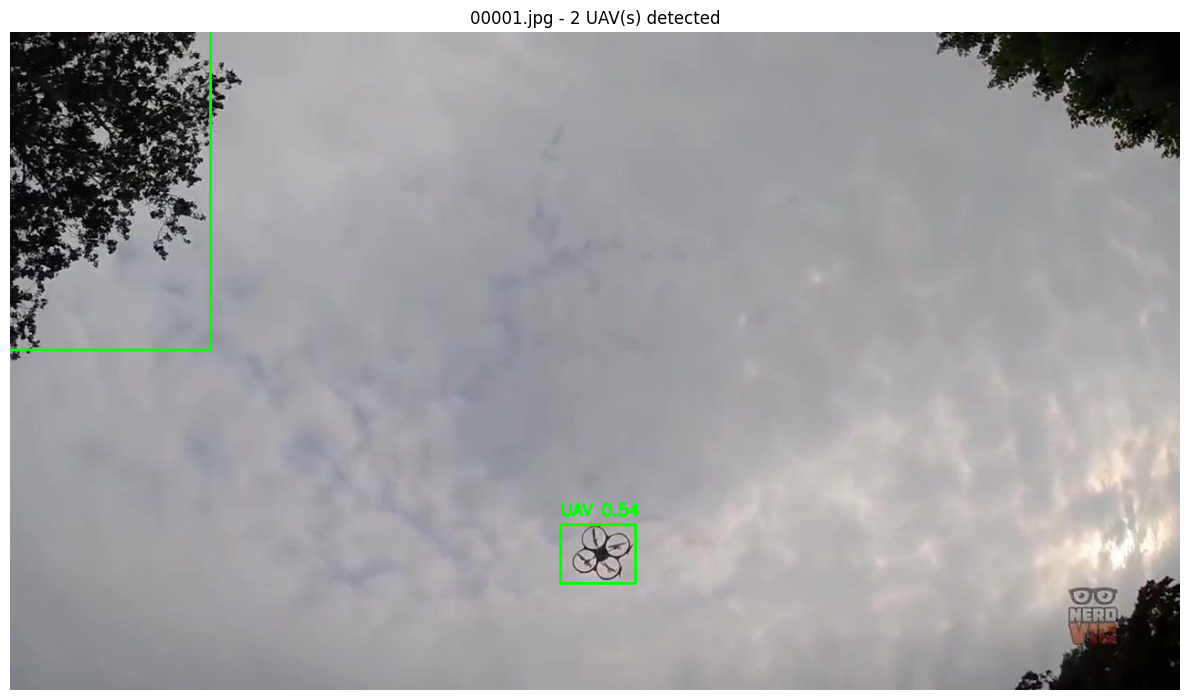


Image 2/5: 00002.jpg
  Detections: 1 UAVs found (confidence > 0.5)


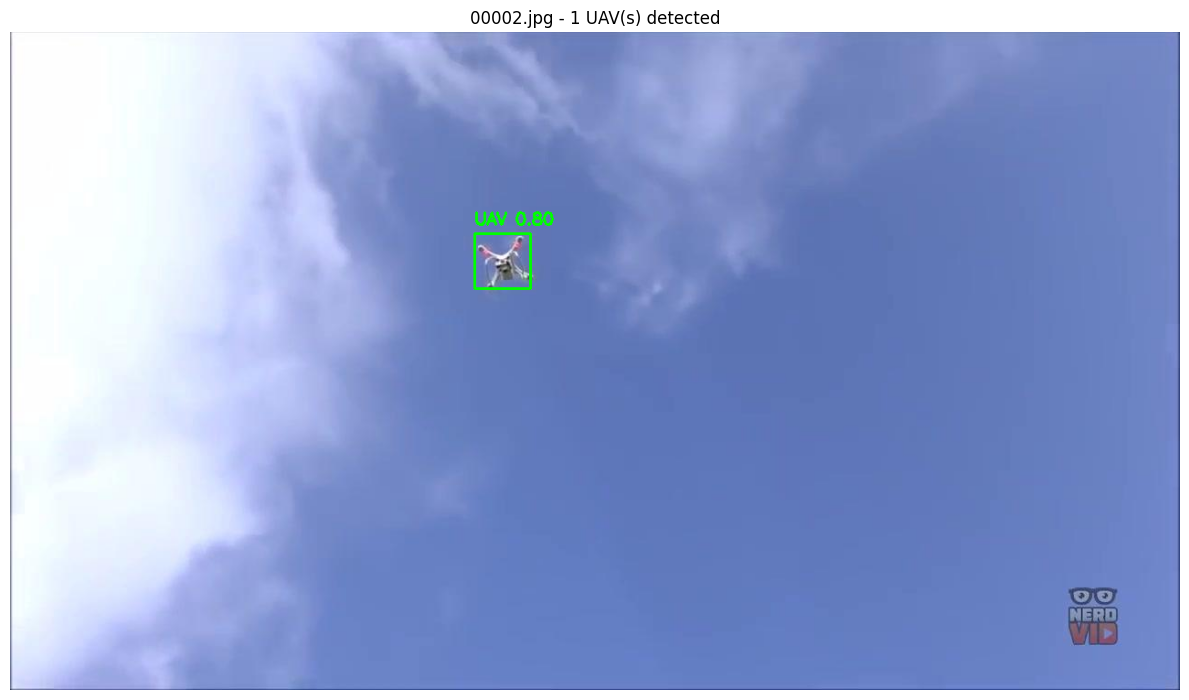


Image 3/5: 00003.jpg
  Detections: 1 UAVs found (confidence > 0.5)


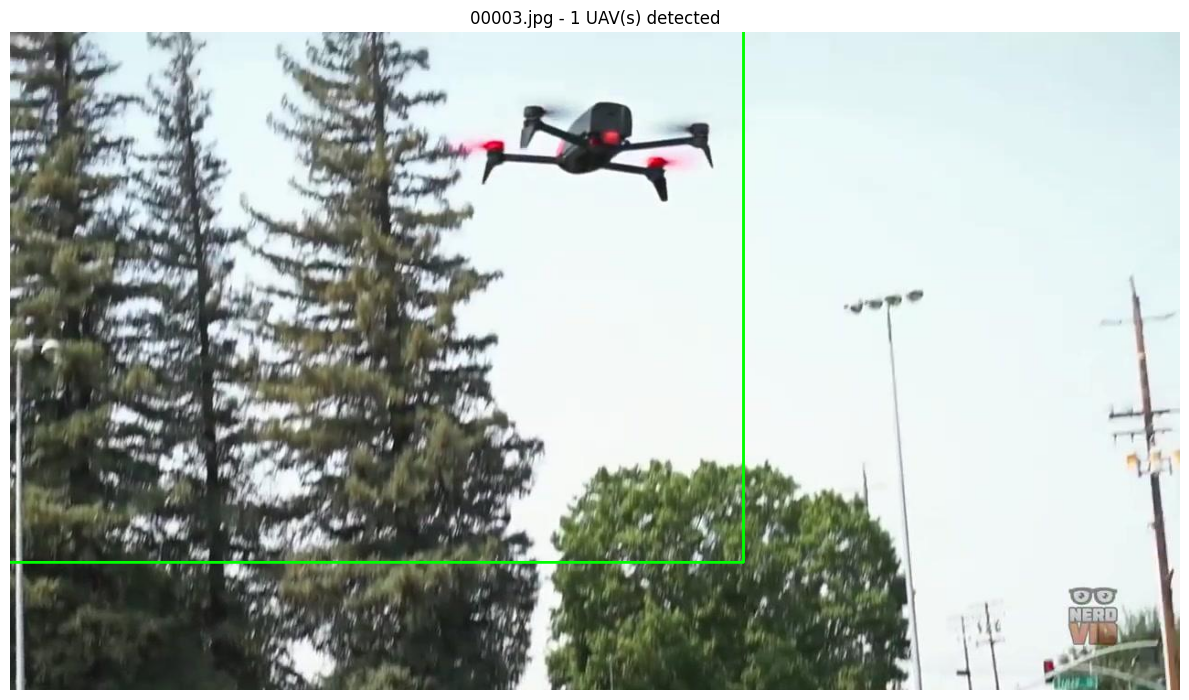


Image 4/5: 00004.jpg
  Detections: 1 UAVs found (confidence > 0.5)


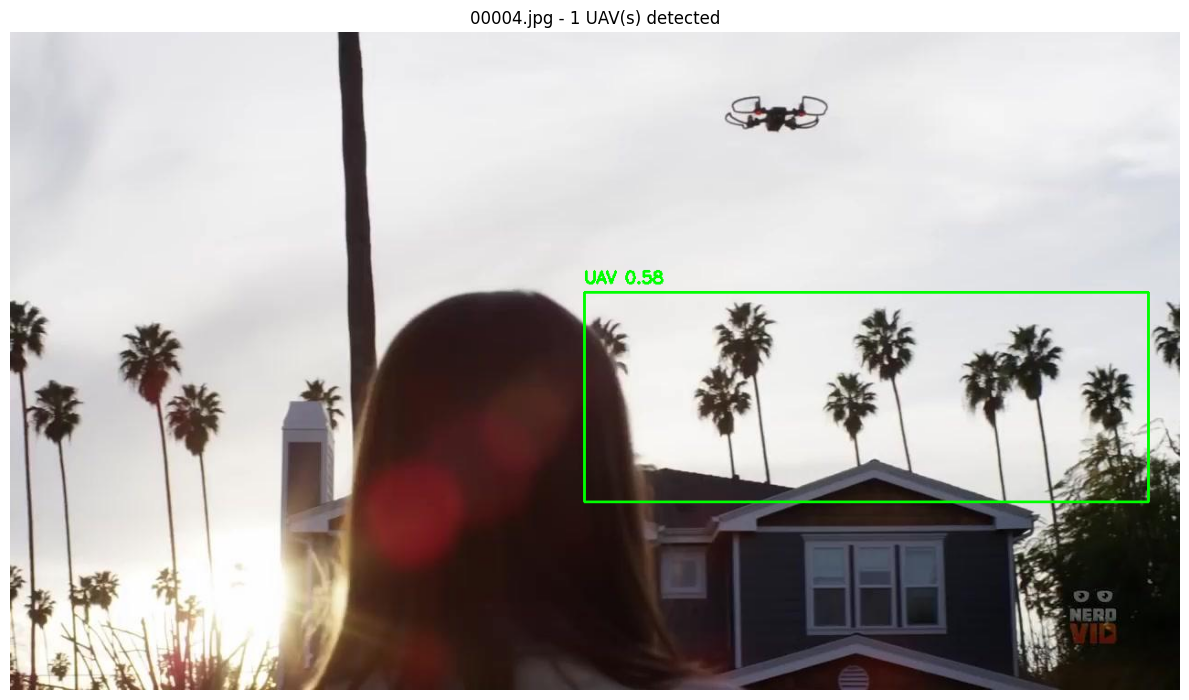


Image 5/5: 00005.jpg
  Detections: 1 UAVs found (confidence > 0.5)


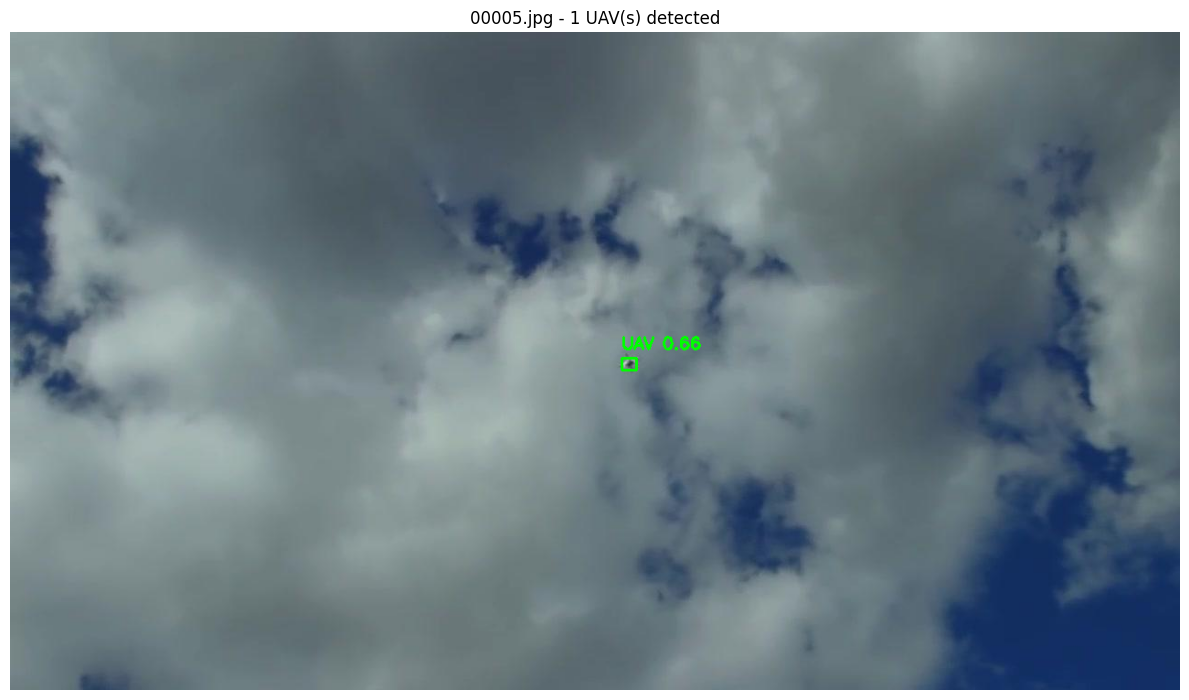


✅ Inference complete!


In [ ]:
import torch
from PIL import Image
import sys
sys.path.insert(0, '/content/RT-DETR/rtdetr_pytorch')

from src.core import YAMLConfig
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Load model
print("Loading model...")
cfg = YAMLConfig('/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml')
checkpoint = torch.load('/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth')

model = cfg.model
model.load_state_dict(checkpoint['ema']['module'])
model.eval()
model.cuda()
print("✓ Model loaded successfully")

# Define preprocessing transforms
transform = T.Compose([
    T.Resize((640, 640)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Run inference on test images
test_img_dir = '/content/DUT-test/test/img'
sample_images = sorted(os.listdir(test_img_dir))[:5]  # First 5 images

print(f"\nRunning inference on {len(sample_images)} test images...\n")

for idx, img_name in enumerate(sample_images):
    img_path = os.path.join(test_img_dir, img_name)

    # Load and preprocess image
    img_pil = Image.open(img_path).convert('RGB')
    orig_w, orig_h = img_pil.size

    # Transform for model
    img_tensor = transform(img_pil).unsqueeze(0).cuda()

    # Run inference
    with torch.no_grad():
        outputs = model(img_tensor)

    # Process outputs
    # RT-DETR outputs: dict with 'pred_boxes' and 'pred_logits'
    pred_boxes = outputs['pred_boxes'][0].cpu()  # [num_queries, 4]
    pred_logits = outputs['pred_logits'][0].cpu()  # [num_queries, num_classes]

    # Get scores and filter by confidence threshold
    scores = pred_logits.sigmoid().max(dim=-1)[0]
    confidence_threshold = 0.5

    keep_idx = scores > confidence_threshold
    boxes = pred_boxes[keep_idx]
    scores_filtered = scores[keep_idx]

    print(f"Image {idx+1}/{len(sample_images)}: {img_name}")
    print(f"  Detections: {len(boxes)} UAVs found (confidence > {confidence_threshold})")

    # Visualize
    img_cv = cv2.imread(img_path)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes
    for box, score in zip(boxes, scores_filtered):
        # Convert from normalized [cx, cy, w, h] to pixel coordinates [x1, y1, x2, y2]
        cx, cy, w, h = box.tolist()
        x1 = int((cx - w/2) * orig_w)
        y1 = int((cy - h/2) * orig_h)
        x2 = int((cx + w/2) * orig_w)
        y2 = int((cy + h/2) * orig_h)

        # Draw box
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw label
        label = f'UAV {score:.2f}'
        cv2.putText(img_cv, label, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(img_cv)
    plt.title(f'{img_name} - {len(boxes)} UAV(s) detected')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    print()

print("✅ Inference complete!")


In [ ]:
# CELL: Export to ONNX (Fixed output names)
import torch
import torch.onnx
import sys
sys.path.insert(0, '/content/RT-DETR/rtdetr_pytorch')

from src.core import YAMLConfig

checkpoint_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth'

print("Loading model configuration...")
cfg = YAMLConfig('/content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml')

print(f"Loading checkpoint from {checkpoint_path}...")
checkpoint = torch.load(checkpoint_path, map_location='cuda')

# Build model
model = cfg.model.cuda()

# Load weights
if 'ema' in checkpoint and 'module' in checkpoint['ema']:
    model.load_state_dict(checkpoint['ema']['module'])
    print("✓ Loaded EMA weights")

model.eval()

# Test to see what the model actually outputs
print("\nTesting model outputs...")
dummy_input = torch.randn(1, 3, 640, 640).cuda()
with torch.no_grad():
    test_output = model(dummy_input)

if isinstance(test_output, dict):
    print(f"Output is a dict with keys: {test_output.keys()}")
    num_outputs = len(test_output)
elif isinstance(test_output, (list, tuple)):
    print(f"Output is a tuple/list with {len(test_output)} elements")
    num_outputs = len(test_output)
else:
    print(f"Output type: {type(test_output)}")
    num_outputs = 1

# Export with correct number of outputs
output_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_epoch4.onnx'

print(f"\nExporting to {output_path}...")
torch.onnx.export(
    model,
    dummy_input,
    output_path,
    opset_version=16,
    input_names=['images'],
    output_names=['pred_boxes', 'pred_scores'],  # RT-DETR outputs 2 tensors: boxes and scores
    dynamic_axes={
        'images': {0: 'batch'},
        'pred_boxes': {0: 'batch'},
        'pred_scores': {0: 'batch'}
    },
    verbose=False
)

print("✅ Model exported successfully!")
print(f"Saved at: {output_path}")
print("\nModel I/O:")
print("  Input: 'images' [batch, 3, 640, 640]")
print("  Outputs:")
print("    - 'pred_boxes': [batch, num_queries, 4]  (x1, y1, x2, y2)")
print("    - 'pred_scores': [batch, num_queries, num_classes]")


Loading model configuration...
Loading checkpoint from /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth...
Load PResNet18 state_dict
✓ Loaded EMA weights

Testing model outputs...
Output is a dict with keys: dict_keys(['pred_logits', 'pred_boxes'])

Exporting to /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_epoch4.onnx...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

✅ Model exported successfully!
Saved at: /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_epoch4.onnx

Model I/O:
  Input: 'images' [batch, 3, 640, 640]
  Outputs:
    - 'pred_boxes': [batch, num_queries, 4]  (x1, y1, x2, y2)
    - 'pred_scores': [batch, num_queries, num_classes]


## Generate Training Summary and save to google drive



In [ ]:
import json

summary = {
    'model': 'RT-DETR-R18',
    'dataset': 'DUT UAV Detection',
    'training_config': {
        'epochs': 6,
        'batch_size': 16,
        'learning_rate': 0.0001,
        'total_training_time': '~1.9 hours'
    },
    'final_metrics': {
        'AP@0.50:0.95': 'TBD',  # Fill after training
        'AP@0.50': 'TBD',
        'test_set_AP': 'TBD'
    },
    'checkpoint_path': '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth'
}

# Save to Drive
with open('/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/training_summary.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("Training summary saved!")


Training summary saved!


## Save Trained Model (Portable Format)

In [ ]:
import torch
import sys
sys.path.insert(0, '/content/RT-DETR/rtdetr_pytorch')

# Load the best checkpoint
checkpoint = torch.load('/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth')

# Save in a clean, portable format
model_package = {
    'model_state_dict': checkpoint['ema']['module'],  # Model weights
    'config_path': 'configs/rtdetr/rtdetr_r18vd_uav.yml',
    'num_classes': 1,
    'input_size': 640,
    'class_names': ['UAV'],
    'training_info': {
        'epoch': 4,
        'ap_50_95': 0.446,
        'ap_50': 0.827,
        'dataset': 'DUT UAV Detection'
    }
}

# Save to Google Drive
save_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_best_model.pth'
torch.save(model_package, save_path)

print(f"✅ Model saved to: {save_path}")
print(f"File size: {os.path.getsize(save_path) / (1024*1024):.1f} MB")


✅ Model saved to: /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_best_model.pth
File size: 76.9 MB


## Load Saved Model for Inference

In [ ]:
import torch
import sys
import os

# Add RT-DETR to path
sys.path.insert(0, '/content/RT-DETR/rtdetr_pytorch')
from src.core import YAMLConfig

# Load your saved model
model_path = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/rtdetr_uav_best_model.pth'
print(f"Loading model from {model_path}...")

model_package = torch.load(model_path, map_location='cuda')

# Rebuild model from config
cfg = YAMLConfig('/content/RT-DETR/rtdetr_pytorch/' + model_package['config_path'])
model = cfg.model.cuda()

# Load trained weights
model.load_state_dict(model_package['model_state_dict'])
model.eval()

print("✅ Model loaded successfully!")
print(f"Training Info: AP@0.50:0.95 = {model_package['training_info']['ap_50_95']:.1%}")


## Upload and Test on Own Images

In [ ]:
# CELL:
from google.colab import files
import torch
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Upload images
print("Upload your UAV images (JPG/PNG)...")
uploaded = files.upload()

# Define preprocessing
transform = T.Compose([
    T.Resize((640, 640)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Process each uploaded image
for filename in uploaded.keys():
    print(f"\nProcessing: {filename}")

    # Load image
    img_pil = Image.open(filename).convert('RGB')
    orig_w, orig_h = img_pil.size

    # Preprocess
    img_tensor = transform(img_pil).unsqueeze(0).cuda()

    # Run inference
    with torch.no_grad():
        outputs = model(img_tensor)

    # Get predictions
    pred_boxes = outputs['pred_boxes'][0].cpu()
    pred_logits = outputs['pred_logits'][0].cpu()
    scores = pred_logits.sigmoid().max(dim=-1)[0]

    # Filter by confidence
    confidence_threshold = 0.5
    keep = scores > confidence_threshold
    boxes = pred_boxes[keep]
    scores_filtered = scores[keep]

    print(f"  Found {len(boxes)} UAV(s) with confidence > {confidence_threshold}")

    # Visualize
    img_np = np.array(img_pil)

    for box, score in zip(boxes, scores_filtered):
        # Convert coordinates
        cx, cy, w, h = box.tolist()
        x1 = int((cx - w/2) * orig_w)
        y1 = int((cy - h/2) * orig_h)
        x2 = int((cx + w/2) * orig_w)
        y2 = int((cy + h/2) * orig_h)

        # Draw
        cv2.rectangle(img_np, (x1, y1), (x2, y2), (0, 255, 0), 3)
        label = f'UAV {score:.2f}'
        cv2.putText(img_np, label, (x1, y1-10),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # Display
    plt.figure(figsize=(15, 10))
    plt.imshow(img_np)
    plt.title(f'{filename} - {len(boxes)} UAV(s) detected')
    plt.axis('off')
    plt.show()


Upload your UAV images (JPG/PNG)...


## Test on Images from URL

In [ ]:
import requests
from io import BytesIO

# Example: Test on image from URL
image_url = "https://example.com/uav_image.jpg"  # Replace with your URL

print(f"Downloading image from: {image_url}")
response = requests.get(image_url)
img_pil = Image.open(BytesIO(response.content)).convert('RGB')

# Same inference code as above
orig_w, orig_h = img_pil.size
img_tensor = transform(img_pil).unsqueeze(0).cuda()

with torch.no_grad():
    outputs = model(img_tensor)

pred_boxes = outputs['pred_boxes'][0].cpu()
pred_logits = outputs['pred_logits'][0].cpu()
scores = pred_logits.sigmoid().max(dim=-1)[0]

# Visualize results...
# (same visualization code as above)


# Resume Training for More Epochs

In [ ]:
import os
os.chdir('/content/RT-DETR/rtdetr_pytorch')

# Update config to continue training
!python tools/train.py \
  -c configs/rtdetr/rtdetr_r18vd_uav.yml \
  -r /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0004.pth \
  --resume


## Train 6 More Epochs

In [ ]:
%%writefile /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r18vd_uav.yml

__include__: [
  '../dataset/coco_detection.yml',
  '../runtime.yml',
  'rtdetr_r18vd_6x_coco.yml',
]

num_classes: 1
remap_mscoco_category: False

epochs: 12  # Changed from 6 to 12 for more training

output_dir: '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'

train_dataloader:
  dataset:
    img_folder: '/content/DUT-train/train/img'
    ann_file: '/content/DUT-train/annotations/train.json'
  batch_size: 16
  num_workers: 2

val_dataloader:
  dataset:
    img_folder: '/content/DUT-val/val/img'
    ann_file: '/content/DUT-val/annotations/val.json'
  batch_size: 16
  num_workers: 2


In [ ]:
!cd /content/RT-DETR/rtdetr_pytorch && \
python tools/train.py \
  -c configs/rtdetr/rtdetr_r18vd_uav.yml \
  -r /content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output/checkpoint0005.pth \
  --resume


## Reusable Inference Function

In [ ]:
def detect_uavs(image_path, model, confidence_threshold=0.5):
    """
    Detect UAVs in an image

    Args:
        image_path: Path to image file or PIL Image object
        model: Loaded RT-DETR model
        confidence_threshold: Minimum confidence score

    Returns:
        List of detections [(x1, y1, x2, y2, score), ...]
    """
    import torch
    from PIL import Image
    import torchvision.transforms as T

    # Load image
    if isinstance(image_path, str):
        img_pil = Image.open(image_path).convert('RGB')
    else:
        img_pil = image_path

    orig_w, orig_h = img_pil.size

    # Preprocess
    transform = T.Compose([
        T.Resize((640, 640)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    img_tensor = transform(img_pil).unsqueeze(0).cuda()

    # Inference
    with torch.no_grad():
        outputs = model(img_tensor)

    # Process outputs
    pred_boxes = outputs['pred_boxes'][0].cpu()
    pred_logits = outputs['pred_logits'][0].cpu()
    scores = pred_logits.sigmoid().max(dim=-1)[0]

    # Filter
    keep = scores > confidence_threshold
    boxes = pred_boxes[keep]
    scores_filtered = scores[keep]

    # Convert to pixel coordinates
    detections = []
    for box, score in zip(boxes, scores_filtered):
        cx, cy, w, h = box.tolist()
        x1 = int((cx - w/2) * orig_w)
        y1 = int((cy - h/2) * orig_h)
        x2 = int((cx + w/2) * orig_w)
        y2 = int((cy + h/2) * orig_h)
        detections.append((x1, y1, x2, y2, score.item()))

    return detections, img_pil

# Usage
detections, img = detect_uavs('/path/to/image.jpg', model, confidence_threshold=0.5)
print(f"Found {len(detections)} UAVs")
for i, (x1, y1, x2, y2, score) in enumerate(detections):
    print(f"  UAV {i+1}: Box=({x1},{y1},{x2},{y2}), Confidence={score:.2f}")


In [ ]:
# os.chdir('/content/RT-DETR/rtdetr_pytorch')
# output_dir = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'
# os.makedirs(output_dir, exist_ok=True)

# print("=" * 70)
# print("🚀 Starting RT-DETR Training")
# print("=" * 70)

# !python tools/train.py \
#     -c configs/rtdetr/rtdetr_r18vd_uav.yml \
#     --seed 0

# print("\n✅ Training complete!")

In [ ]:
!ls -la /content/RT-DETR/rtdetr_pytorch/configs/rtdetr/include/

In [ ]:
# The output directory is set to Google Drive folder

output_dir = '/content/drive/MyDrive/FYP_datasets/Vision-RGB/DUT/output'

!python tools/train.py \
    -c configs/rtdetr/rtdetr_r18vd_uav.yml \
    --output_dir {output_dir} \
    --amp

In [ ]:
import torchvision
print(f"Torchvision version: {torchvision.__version__}")
print(f"Has datapoints: {hasattr(torchvision, 'datapoints')}")
print(f"Has tv_tensors: {hasattr(torchvision, 'tv_tensors')}")

## To see what's available in current torchvision

In [ ]:
#
import torchvision

print("Available in torchvision:")
print([attr for attr in dir(torchvision) if not attr.startswith('_')])

print("\n\nChecking tv_tensors location:")
try:
    from torchvision import tv_tensors
    print(f"✓ tv_tensors found at: {tv_tensors}")
except ImportError as e:
    print(f"✗ tv_tensors not found: {e}")

print("\nChecking datapoints:")
try:
    from torchvision import datapoints
    print(f"✓ datapoints found")
except ImportError as e:
    print(f"✗ datapoints not found: {e}")

## Quick diagnostic

In [ ]:
try:
    from torchvision import tv_tensors
    print("✓ tv_tensors IS available!")
    print(f"  Location: {tv_tensors.__file__}")
    print(f"  Contents: {dir(tv_tensors)[:10]}")  # Show first 10 items
except ImportError as e:
    print(f"✗ tv_tensors NOT available: {e}")
    print("\nThis means we need a different approach!")